
 Integrantes:
  - Alberto Rubinho Peruchi
  - Giovani Kisz
  - Guilherme Indicate
  - Rayara Amaro Figueiredo



# Modelo de tópico

O tópico será abordado baseado nos temas para explicar a Teleportação Quântica, desde o início da Computação Quântica até os processo utlizados da Teleportação Quantica.

Cada tópico, tem como objetivo explicar de forma mais simples o tema, de forma que seja etendível por um público mais abrangente.

Cada tópico, além de sua explicação conceitual, deve apresentar um exemplo em `Qiskit`.


# Tópicos
- Computação Quântica (Qubit)
- Qiskit (Importação e Hello Word)
- Operadores Quânticos (Focar em Hadamard, CNOT)
- Teleportação Quântica (Teleportação Básica)
- - SUCESSO
## Opcional (se der tempo)
Fazer a explicação da Teleportação através de um circuito, aplicada em um conceito da computação Clássica:
- Mandar informação de forma segura
- Sistema de pagamentos
- Tranferencias de Ativos (será que vamos criar a nova Blochain?)

## COMO VAMOS FAZER?
Quem tiver tempo, olha o tópico (de cima para baixo) que não foi feito e faça o que puder.
**De preferência, da um toque no slack porque o Collab é bugado e a gente não quer ter trabalho dobrado**

-------------------

## Computação Quântica

A computação quântica está mudando tudo o que sabemos sobre tecnologia. Imagine um tipo de computador tão poderoso que pode resolver em segundos problemas que levariam anos para as máquinas atuais. **Essa é a promessa da computação quântica, uma inovação que combina física, matemática e os mistérios da mecânica quântica para criar uma nova era de possibilidades.**

Ao mergulhar no estudo dos computadores quânticos, é essencial perceber que **a mecânica quântica é muito diferente da física clássica.** Explicar o comportamento das partículas quânticas é um desafio, pois nossos conceitos e percepções do mundo natural não são suficientes para descrever fenômenos que, à primeira vista, parecem **contrariar a lógica e o senso comum.**

## Qubit

O qubit, ou bit quântico, é a **unidade fundamental de informação na computação quântica**. Ele pode ser entendido como a versão quântica do bit tradicional, usado pelos computadores clássicos para representar dados em um sistema binário.

O termo **“qubit”** é atribuído ao físico teórico americano Benjamin Schumacher. Em geral, os qubits são formados a partir da **manipulação e medição de partículas quânticas**, que são os menores componentes conhecidos do universo físico, como fótons, elétrons, íons aprisionados, circuitos supercondutores e átomos.

Devido às propriedades únicas da mecânica quântica, os computadores quânticos utilizam **qubits para armazenar uma quantidade muito maior de informações** do que os bits tradicionais. Isso permite aprimorar significativamente os sistemas de criptografia e executar cálculos extremamente complexos, que levariam milhares de anos, ou talvez fossem impossíveis de realizar, mesmo com os supercomputadores mais potentes da atualidade.

### Qubit vs bits

Um bit clássico só pode assumir o valor 0 ou 1. Já os qubits possuem uma característica especial chamada **superposição**, que permite que eles representem 0, 1 e todos os estados intermediários ao mesmo tempo, formando assim três possibilidades distintas.

Mesmo podendo representar essas três posições, os qubits ainda são utilizados dentro de sistemas baseados em lógica binária. Nesses sistemas, o termo bit pode se referir tanto ao elemento físico ou ao processo usado para representar 0 e 1, quanto à medição que determina o valor final desse bit.

Como cada bit pode representar um 0 ou um 1, ao emparelhar dois bits de informação, podemos criar até **quatro combinações binárias singulares:**

- 00
- 01
- 10
- 11

Embora cada bit possa ser 0 ou 1, **um único qubit pode ser 0, 1 ou uma superposição.** Uma superposição quântica pode ser descrita tanto como 0 quanto como 1, ou como todos os estados possíveis entre 0 e 1, pois, na verdade, representa a **probabilidade do estado do qubit.**

No nível quântico, a probabilidade associada a um qubit é descrita por uma **função de onda**. A amplitude dessa probabilidade permite que o qubit codifique mais de um bit de informação e, quando combinado com outros qubits, seja capaz de realizar cálculos altamente complexos.

Para entender melhor a diferença entre bits e qubits, imagine que você está no centro de um labirinto complexo. Um computador tradicional precisaria encontrar a saída por meio da tentativa e erro, testando cada caminho possível até descobrir qual leva ao fim. Nesse processo, ele usaria bits para registrar os caminhos já explorados e identificar os becos sem saída.

Um computador quântico, por outro lado, pode ser comparado a alguém que consegue ver o labirinto inteiro de uma só vez, analisando diversos caminhos simultaneamente até revelar a rota correta. No entanto, isso **não significa que os qubits literalmente testam vários caminhos ao mesmo tempo**. O que acontece é que os computadores quânticos utilizam as **amplitudes de probabilidade dos qubits para calcular o resultado.** Como essas amplitudes se comportam como **ondas**, elas podem se sobrepor e interferir entre si. Quando ondas fora de fase se encontram, elas anulam certas possibilidades incorretas, enquanto as ondas que permanecem coerentes se reforçam e indicam a solução correta.

Apesar de seu enorme potencial, **os qubits são extremamente temperamentais**. Para que funcionem corretamente, precisam ser mantidos a temperaturas próximas do zero absoluto, ainda mais frias do que as do próprio espaço sideral.

-------------------

## Qiskit

O Qiskit é o conjunto de softwares mais popular e eficiente do mundo para computação quântica e pesquisa de algoritmos.

### Instalação

Primeiramente é necessário ter o Python instalado, pois no Qiskit utilizamos essa linguagem de programação.

- Navegue até o diretório do seu projeto e crie um ambiente mínimo com apenas o Python instalado. Também é necessário instalar o **pip** para conseguir fazer o download das bibliotecas que vamos utilizar.

Entretanto, neste projeto, vamos utilizar o Jupyter Notebook no Colab, portanto não é necessário fazer esses downloads, o que torna a aplicação mais prática.


In [2]:
#Instale o Qiskit

%pip install qiskit
%pip install qiskit[visualization]
%pip install qiskit-ibm-runtime



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
zsh:1: no matches found: qiskit[visualization]
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [qiskit-ibm-runtime]iskit-ibm-runtime]es]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Hello World no Qiskit

Após instalar o Qiskit, vamos aprender como fazer o clássico "Hello World" no Qiskit.

É necessário ter uma conta na IBM Quantum Plataform, vamos precisar utilizar uma *IBM API KEY* e *CRN* da nossa instancia.

Você pode entrar e fazer login neste link: [IBM Quatum Plataform]("https://quantum.cloud.ibm.com/")

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
#Configure sua autenticação para acesso ao hardware quântico
QiskitRuntimeService.save_account(
token="FRvsJos2FyN763U9VHjE1ybAJZMqYKr1KrNgzBvINba7",
instance="crn:v1:bluemix:public:quantum-computing:us-east:a/64679cafb73b453baf40b42639b8eecf:698bfb9b-ce3a-4b2b-abec-eed12955d0cd::",
)

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Vamos rodar esse código quando queremos utilizar o Qiskit (lembrando que temos apenas 10 minutos gratuitos)
service = QiskitRuntimeService()

### Criando nosso projeto Hello World

#### O que é um “Hello World” em qualquer linguagem

No mundo da programação, o clássico “Hello, World!” é o primeiro programa que você escreve para testar se o ambiente está funcionando, ele mostra o caminho básico:

- Escrever o código;
- Executar;
- Observar um resultado simples, mas significativo.

#### O equivalente quântico

Na computação quântica, gerar e medir um estado emaranhado (como o GHZ ou Bell) cumpre o mesmo papel:

- Você cria um circuito quântico simples (com 2 qubits),
- Aplica algumas portas (Hadamard e CNOT),
- Mede e observa um resultado fundamental da física quântica: o emaranhamento.

#### Passo 1. Mapeie o problema para um formato nativo da computação quântica.

A célula de código a seguir constrói um circuito quântico que gera um estado de Bell, um tipo especial de estado em que dois qubits ficam completamente emaranhados, ou seja, o estado de um qubit depende diretamente do estado do outro, mesmo que estejam separados.

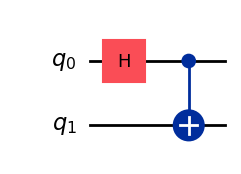

In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Cria um novo circuito com dois qubits
qc = QuantumCircuit(2)

# Adiciona uma porta Hadamard ao qubit 0
qc.h(0)

# Executa uma porta controlada-X (CNOT) no qubit 1, controlada pelo qubit 0
qc.cx(0, 1)

# Retorna um desenho do circuito usando o MatPlotLib ("mpl").
qc.draw("mpl")


Ao criar circuitos quânticos, é importante pensar no tipo de informação que você deseja obter ao final da execução.
No Qiskit, há duas maneiras principais de analisar os resultados. A primeira é por meio de uma distribuição de probabilidade, que mostra com que frequência cada combinação de bits (como 00, 01, 10 ou 11) aparece nas medições dos qubits. A segunda forma é o cálculo do valor esperado de um observável, que representa o resultado médio de uma medição específica e descreve o comportamento físico do sistema quântico.

Neste exemplo, serão calculados valores esperados usando o submódulo qiskit.quantum_info. Esse módulo trabalha com operadores, que são objetos matemáticos utilizados para representar ações ou transformações aplicadas a um estado quântico.

A célula de código a seguir cria seis operadores de Pauli de dois qubits: IZ, IX, ZI, XI, ZZ e XX. Esses operadores serão usados para analisar o comportamento do circuito.

In [12]:
# Configura seis observáveis diferentes.

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]



>>>Aqui, algo como o operador ZZ é uma forma abreviada de representar o produto tensorial Z ⊗ Z, o que significa medir o operador Z no qubit 1 e o operador Z no qubit 0 ao mesmo tempo. Essa operação fornece informações sobre a correlação entre os dois qubits. Valores esperados desse tipo são geralmente escritos como ⟨Z₁Z₀⟩.

>>>Se o estado estiver emaranhado, a medição de ⟨Z₁Z₀⟩ será diferente das medições de ⟨I₁ ⊗ Z₀⟩ ou ⟨Z₁ ⊗ I₀⟩, onde I representa o operador identidade. Para o estado emaranhado específico criado pelo circuito mencionado anteriormente, o valor esperado de ⟨Z₁Z₀⟩ deve ser igual a 1, enquanto o valor esperado de ⟨I₁ ⊗ Z₀⟩ e ⟨Z₁ ⊗ I₀⟩ deve ser igual a 0.


#### Passo 2. Otimizar os circuitos e operadores

O próximo passo consiste em preparar o circuito e os observáveis para que sejam compatíveis com o dispositivo quântico que será utilizado.
O código a seguir instancia um backend real, ou seja, um processador quântico disponível, e ajusta o circuito e os operadores para que correspondam à arquitetura específica (ISA) desse dispositivo.

Para executar essa etapa corretamente, é importante já ter suas credenciais do IBM Quantum salvas no ambiente, pois elas permitem o acesso ao backend

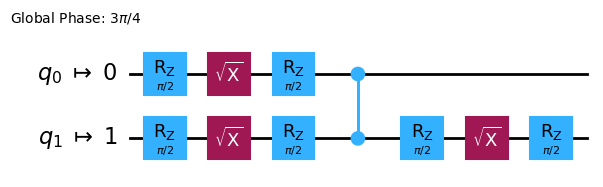

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Converter para um circuito ISA e observáveis mapeados em layout.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

#### Passo 3. Execute usando as primitivas quânticas



In [8]:
# Constrói a instância do Estimator.

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# Um único "pub", com um circuito executado contra cinco observáveis diferentes.
job = estimator.run([(isa_circuit, mapped_observables)])

# Use o ID do job para recuperar seus dados posteriormente
print(f">>> ID do Job: {job.job_id()}")


>>> ID do Job: d488aed5mhvc73f8mi0g


In [9]:
# Este é o resultado de toda a submissão. Você enviou um único "Pub",
# portanto, isso contém um único resultado interno (e alguns metadados próprios).
job_result = job.result()

# Este é o resultado do nosso único "pub", que tinha seis observáveis,
# portanto, contém informações sobre todos os seis.
pub_result = job.result()[0]


#### Passo 4. Analise os resultados

Nesta etapa, é hora de explorar e interpretar o que foi medido.
Você pode usar os resultados obtidos para entender o comportamento do circuito quântico e, se quiser, aplicar técnicas que melhoram a qualidade das medições, como a mitigação de erros ou a extrapolação de ruído zero (ZNE), métodos que ajudam a reduzir o impacto do ruído presente nos dispositivos quânticos atuais.

Além disso, esses resultados podem servir de base para outras análises ou visualizações, como gráficos e comparações entre diferentes execuções.

No nosso exemplo, vamos simplesmente plotar um gráfico mostrando os valores esperados medidos para o circuito criado, o que nos permite observar visualmente o comportamento quântico obtido.

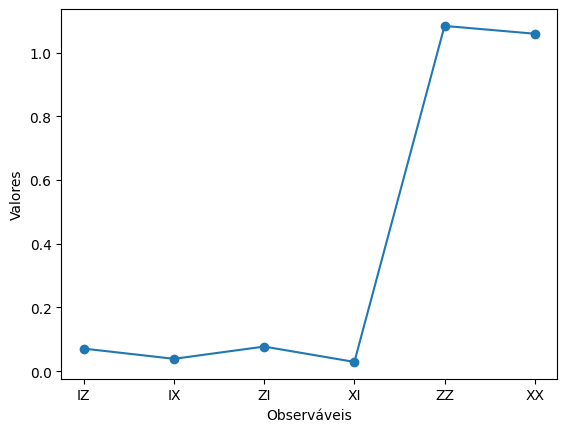

In [10]:
# Plota o resultado

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# Plotando o gráfico
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observáveis")
plt.ylabel("Valores")
plt.show()


#### Por que isso é o “Hello World” quântico

Porque:

- É o experimento mais simples que mostra o comportamento não clássico de um computador quântico.

- Demonstra superposição e correlação quântica, que são as bases de tudo o que vem depois (teletransporte quântico, criptografia, etc).

- Testa se o ambiente, simulador e backend estão funcionando corretamente (assim como o “Hello World” mostra que o compilador e a saída de texto funcionam).

### Conclusões — O Hello World Quântico

Com este experimento, foi possível compreender o funcionamento básico de um circuito quântico e observar, na prática, um dos fenômenos mais marcantes da mecânica quântica: o emaranhamento.

Ao criar o estado de Bell, vimos que cada qubit individualmente apresenta resultados aleatórios, mas quando os dois são medidos juntos, seus resultados estão perfeitamente correlacionados. Isso mostra que os qubits compartilham uma relação que não pode ser explicada pela física clássica, caracterizando o emaranhamento quântico.

Em resumo, aprendemos que:

- A superposição permite que um qubit represente múltiplos estados ao mesmo tempo.
- O emaranhamento conecta qubits de forma que o estado de um depende do outro.
- Essas duas propriedades são a base do poder computacional dos computadores quânticos.

O “Hello World quântico” é, portanto, o primeiro passo para entender como a informação é criada, manipulada e medida em um sistema quântico.

--------

## O que são Operadores Quânticos?

Na computação quântica, os **operadores quânticos** (ou **portas quânticas**) são as ações básicas que alteram o estado dos **qubits**, que são os blocos fundamentais da informação quântica.  
Diferente dos bits clássicos, que só podem assumir o valor 0 ou 1, um qubit pode ser **0 e 1 ao mesmo tempo**, até o momento em que é medido.  
> Uma boa forma de imaginar isso é como uma **moeda girando no ar**: enquanto ela gira, não é apenas cara ou coroa, é uma mistura das duas.

As portas quânticas são as ferramentas usadas para controlar essa “moeda girando”.  
Elas mudam o comportamento do qubit, ajustando sua orientação, criando combinações de estados ou conectando qubits entre si, de forma que o que acontece com um afeta o outro.

Essas operações tornam possível construir todos os algoritmos quânticos.  
Por exemplo:  
- **Porta Hadamard (H)**: introduz incerteza, colocando o qubit em um estado de superposição (0 e 1 ao mesmo tempo).  
- **Porta CNOT (Controlled-NOT)**: conecta dois qubits para que seus resultados fiquem ligados, criando entrelaçamento (*entanglement*).

Juntas, essas duas portas formam a base para conceitos mais avançados, como a **teleportação quântica**.

----------------

### Explicação (Hadamard)

A porta Hadamard transforma um estado quântico (|0⟩ ou |1⟩) em um estado de superposição, ou seja, uma combinação linear dos dois.

Pensa assim:

Um feixe de luz pode vibrar só na horizontal ou só na vertical, como se fossem duas direções possíveis.
- Horizontal: representa o zero, como |0⟩
- Vertical: representa o um, como |1⟩

Agora imagine que você gira o filtro de luz **45 graus** (na diagonal)
A luz que sai não é só horizontal nem só vertical, ela está nos dois jeitos ao mesmo tempo.

Isso é o que a porta **Hadamard** faz com um **qubit**:
Ela gira o filtro **metaforicamente** e coloca o qubit em uma mistura equilibrada de 0 e 1, onde ele tem a mesma chance de ser medido como qualquer um dos dois.

#### Analogia simples:
```
"Eu sou 0 e 1 ao mesmo tempo, só decido quando você me olha"
```

---------------------

### Explicação (CNOT)

A porta **CNOT (Controlled-NOT)** atua em **dois qubits**, um de **controle** e um **alvo**.  
Ela inverte o estado do qubit alvo **somente se** o qubit de controle estiver no estado |1⟩.

Pensa assim:  

Imagina **duas lâmpadas inteligentes** conectadas entre si.

- A **primeira lâmpada** é o **controle**.  
- A **segunda lâmpada** é o **alvo**.

Se a lâmpada de controle estiver **apagada (0)**, nada acontece com a outra.  
Mas se a lâmpada de controle **acender (1)**, a lâmpada alvo **inverte** o seu estado, se estava acesa, apaga; se estava apagada, acende.

Agora vem a parte quântica:
E se a primeira lâmpada estiver **meio acesa e meio apagada ao mesmo tempo** (em superposição)?  
Nesse caso, as duas lâmpadas passam a ficar **ligadas de forma invisível**, compartilhando o mesmo comportamento.  
Quando uma “decide” acender, a outra acompanha instantaneamente, mesmo que estejam longe uma da outra.

Isso é o **entrelaçamento quântico**:  
um vínculo entre qubits onde o estado de um depende diretamente do outro.  
A CNOT é a operação que **cria** essa conexão.

#### Analogia simples:
```
"Se eu acendo, você apaga; se eu apago, você acende, mas se eu estiver nos dois estados, nós dois ficamos conectados"
```

------------------

### Exemplo em Qiskit

In [ ]:
# Bibliotecas necessárias para simular e visualizar circuitos quânticos.
%pip3 install qiskit matplotlib

In [ ]:
from qiskit import QuantumCircuit, transpile

qc = QuantumCircuit(2) # Criamos um circuito com 2 qubits.
qc.h(0)                # Aplicamos Hadamard no primeiro qubit, cria superposição
qc.cx(0, 1)            # Aplica CNOT usando o primeiro como controle e o segundo como alvo, cria entrelaçamento
qc.measure_all()       # Adiciona medições automáticas para testes
qc.draw('mpl')         # Desenha o circuito

In [ ]:
from qiskit_aer import Aer

sim = Aer.get_backend('aer_simulator')                   # Simulador de computador quântico
compiled_circuit = transpile(qc, sim)                    # Traduz o circuito `qc` para um formato compatível com o simulador aer_simulator
result = sim.run(compiled_circuit, shots=100).result()   # Executa o circuito 100 vezes

counts = result.get_counts()                             # Faz a contagem de quantas vezes de '00' e '11'
print(counts)

In [ ]:
from qiskit.visualization import plot_histogram
 
counts = result.get_counts()
plot_histogram(counts) # Visualização da célula anterior em formato de gráfico